# Demonstration of transformation for time series

### Read PAMAP2 dataset and take a sample of that

In [4]:
from cnn1d_modules import Dataset
from data_transformation import *
import matplotlib.pyplot as plt
from transformation import identity, negate, flip, permute, time_warp

%load_ext autoreload
%autoreload 2
dataset = Dataset("pa2")
dataset.read_dataset()
dataset.downsample_dataset()
dataset.segment_dataset()
dataset.get_final()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
PATH:  /home/dmitrii/GitHub/SDAPraktikum/E3/PAMAP2_Dataset/pamap2.h5
x_train shape =  (128247, 52)
y_train shape = (128247,)
x_test shape = (22659, 52)
y_test shape = (22659,)
x_train shape(downsampled) =  (42749, 52)
y_train shape(downsampled) = (42749,)
x_test shape(downsampled) = (7553, 52)
y_test shape(downsampled) = (7553,)
[ 1  2  3  4  5  6  7 11 12 13 14 18]
[ 1  2  3  4  5  6  7 11 12 13 14 18]
segmenting signal...
signal segmented.
train_x shape = (3561, 25, 52)
train_y shape = (3561,)
test_x shape = (628, 25, 52)
test_y shape = (628,)
unique test_y [0 1]
unique train_y [0 1]
test_y[1]= [1 0 0 0 0 0 0 0 0 0 0]
train_y shape(1-hot) = (3561, 11)
test_y shape(1-hot) = (628, 11)


In [5]:
x_test = dataset.test_x
print(x_test.shape)
x_test = x_test[1]
print(x_test.shape)

(628, 25, 52)
(25, 52)


### Visualize original untransformed time series

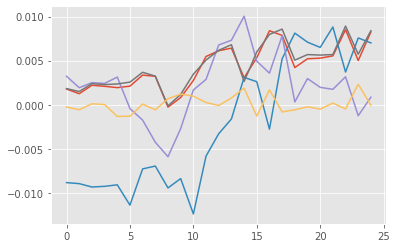

In [6]:
sample = x_test[:,5:10 ]
sample = np.swapaxes(sample, 0, 1)
myplot = plt.plot(sample.T)

In [7]:
sample.shape

(5, 25)

### Import transformations and visualize them

(5, 25)


/home/dmitrii/GitHub/SDAPraktikum/E3/transformation.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  splitted = np.array(np.split(sample_i, np.append(segments, sample.shape[1])))


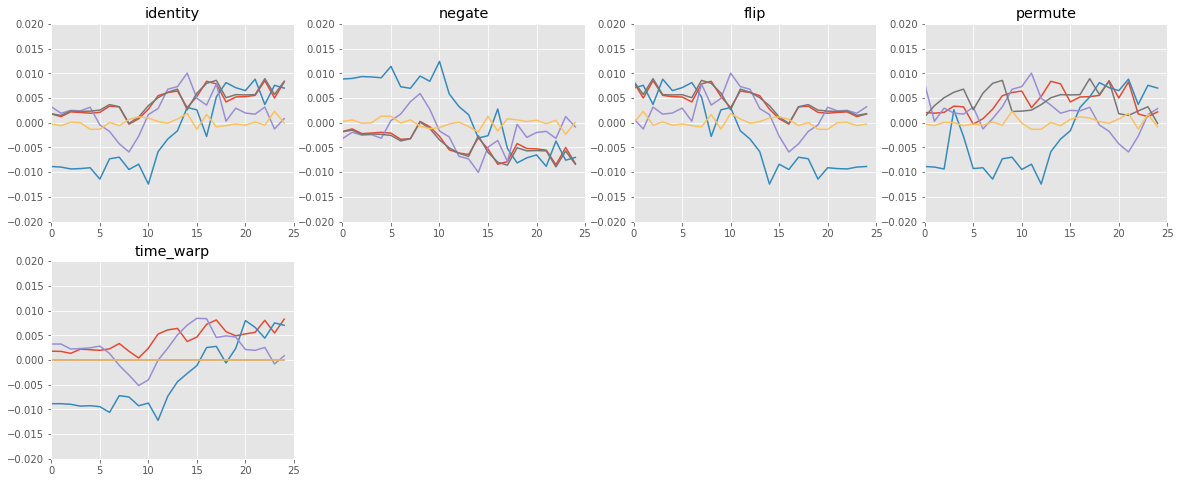

In [8]:
x_resolution = [0,25]
y_resolution = [-0.02,0.02]
fig = plt.figure(figsize=(20,8))
print(sample.shape)
transforms = [identity, negate, flip, permute, time_warp]
for ii, transform in enumerate(transforms):
    ax = fig.add_subplot(2,4,ii+1)
    sample_transformed = transform(sample)

    ax.plot(sample_transformed.T)
    ax.title.set_text(str(transform.__name__))
    ax.set_xlim(x_resolution)
    ax.set_ylim(y_resolution)